In [1]:
import pandas as pd
import numpy as np
import seaborn as sns




clicksDF = pd.read_csv('data/clicks.csv.gzip', compression='gzip', dtype={'advertiser_id':'int32','action_id':'float32','source_id':'int32','country_code':'category',\
                                                                           'latitude':'float32','longitude':'float32','carrier_id':'float32','os_minor':'category',\
                                                                           'os_major':'category','specs_brand':'category','timeToClick':'float32','touchX':'float32',\
                                                                           'touchY':'float32','ref_type':'category'}, index_col='trans_id')
clicksDF['created'] = pd.to_datetime(clicksDF['created'])
eventsDF = pd.read_csv('data/events.csv.gzip', compression='gzip',low_memory=False, dtype={'event_id':'int32','ref_type':'category','application_id':'int32',\
                                                                                            'attributed':'bool','device_countrycode':'category','device_city':'category',\
                                                                                            'trans_id':'category','carrier':'category','device_os':'category',\
                                                                                            'wifi':'bool','connection_type':'category'}, index_col='event_uuid')
eventsDF['date'] = pd.to_datetime(eventsDF['date'])
installsDF = pd.read_csv('data/installs.csv.gzip', compression='gzip',index_col='ref_hash', dtype={'ref_type':'category','application_id':'int32',\
                                                                                              'device_brand':'category','click_hash':'float32','wifi':'bool'\
                                                                                            })
installsDF['created'] = pd.to_datetime(installsDF['created'])
auctionsDF = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, dtype={'country':'category','platform':'category','ref_type_id':'category'})
#preguntar devide_id , es el cel o el server?

target_competenciaDF = pd.read_csv('data/target_competencia.csv', index_col='index',dtype={'index':'int32','obj_Sc':'int32','obj_St':'int32'})

print('setup done')

setup done


In [15]:
eventsDF.head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
event_uuid,,,,,,,,,,,,,,,,,,,,,
a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1cd98205-0d97-4ec2-a019-667997dbfe7a,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
f02e2924-21ae-492b-b625-9021ae0a4eca,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
a813cf45-a36e-4668-85e2-5395f1564e98,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,8.731902e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [6]:
clicksDF.head(5)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
trans_id,,,,,,,,,,,,,,,,,,,
iGgClCM9exiHF4K31g94XmvHEBSLKIY,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563000,0.905,0.078,1891515180541284343,1904083516767779093
MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013000,0.035,0.431,1891515180541284343,4368617728156436525
X5XTOcYQovkl6yadYdAD7xioVGU9jiY,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.110001,0.054,0.423,1891515180541284343,4368617728156436525


In [7]:
installsDF.head(5)

,created,application_id,ref_type,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
ref_hash,,,,,,,,,,,,,,,,,
8464844987297247076,2019-03-13 01:43:33.445,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
3250564871270161533,2019-03-13 04:58:35.078,0,1891515180541284343,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
7953318831018100268,2019-03-13 04:20:57.666,0,1891515180541284343,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
7953318831018100268,2019-03-13 04:20:57.698,0,1891515180541284343,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
8355110941557237501,2019-03-10 22:24:56.684,0,1891515180541284343,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [8]:
auctionsDF.head(5)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [9]:
target_competenciaDF.head(5)

,ref_hash,obj_Sc,obj_St
index,,,
0,1.378981e+17,0,0
1,1.508792e+17,0,0
2,1.514131e+17,0,0
3,1.516466e+17,0,0
4,2.007704e+17,0,0


### Events
Before datatypes: 402 MB

In [10]:
difference = eventsDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)), 'MB')
difference = 421557567-difference
print('Difference:', int(round(difference/1024/1024)), 'MB')

After datatypes: 269 MB
Difference: 133 MB


### Clicks
Before dtypes: 4 MB

In [11]:
difference = clicksDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)),'MB')
difference = 4031783-difference
print('Difference:', int(round(difference/1024/1024)),'MB')


After datatypes: 2 MB
Difference: 2 MB


### Auctions
Before dtypes: 1045 MB

In [18]:
difference = auctionsDF.memory_usage(index=True).sum()
print('After datatypes:', int(round(difference/1024/1024)),'MB')
difference = 1095993944-difference
print('Difference:', int(round(difference/1024/1024)),'MB')


After datatypes: 653 MB
Difference: 392 MB


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,trans_id,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
event_uuid,,,,,,,,,,,,,,,,,,,,,
2fb36e54-6798-49d5-851b-f000cb285b70,2019-03-13 21:56:52.784,1,1891515180541284343,4385548395465755262,127,False,6333597102633388268,5.908703e+17,NaN,7.407931e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,2387915114096335666,2.177012e+18
5ed07f4d-d47e-486b-a2e8-dc6e059a7605,2019-03-13 21:24:12.661,1,1891515180541284343,4694431469357815884,127,False,6333597102633388268,7.391844e+18,NaN,4.235319e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,2387915114096335666,2.177012e+18
2b9c71cc-2ab7-418f-8acf-a0971c26dc97,2019-03-13 21:35:44.225,1,1891515180541284343,678311247422659891,127,False,6333597102633388268,5.955758e+18,NaN,7.195709e+18,...,7.164321e+18,NaN,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,2387915114096335666,2.177012e+18


In [68]:
clicksDF.head(10)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,touchY_log
trans_id,,,,,,,,,,,,,,,,,,,,
iGgClCM9exiHF4K31g94XmvHEBSLKIY,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563000,0.905,0.078,1891515180541284343,1904083516767779093,0.075107
MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,NaN
vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,0.387301
YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013000,0.035,0.431,1891515180541284343,4368617728156436525,0.358373
X5XTOcYQovkl6yadYdAD7xioVGU9jiY,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.110001,0.054,0.423,1891515180541284343,4368617728156436525,0.352767
dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,5,NaN,4,2019-03-07 18:02:25.833,6333597102633388268,1.209638,1.064208,False,27.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,1.0,NaN,0.606,0.459,1891515180541284343,7925959310979071406,0.377751
cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,3,NaN,1,2019-03-12 15:17:04.453,6333597102633388268,1.209638,1.064208,False,27.0,3.3786399484966047e+18,3.032809e+17,4.566453911975694e+18,2733035977666442898,1.0,NaN,NaN,NaN,1891515180541284343,1709687652740629839,NaN
MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,1,NaN,2,2019-03-06 19:15:47.249,6333597102633388268,1.205393,1.077238,False,NaN,NaN,NaN,NaN,8930605132947907029,NaN,NaN,NaN,NaN,1891515180541284343,2127839020694198991,NaN
1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,3,NaN,0,2019-03-07 23:11:01.934,6333597102633388268,1.205058,1.077332,False,19.0,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,3.129000,0.889,0.977,1891515180541284343,5073558237453939035,0.681581


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


clicksDF['touchY_log'] = np.log(clicksDF['touchY'].dropna()+1)
clicksDF['timeToClick_log'] = np.log(clicksDF['timeToClick'].dropna()+1)

In [157]:
major0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['os_major'].value_counts().index[0]
brand0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['brand'].value_counts().index[0]
specs_brand0 = clicksDF[["touchX","touchY_log",'specs_brand','os_major','brand']].dropna()['specs_brand'].value_counts().index[0]
specs_brand0

'392184377613098015'

In [119]:
clicksDF['brand'].value_counts().index[0]

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

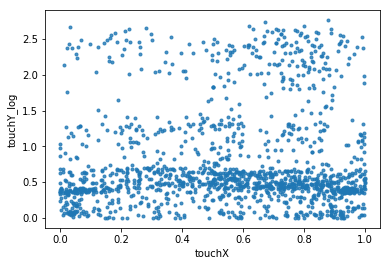

In [152]:
sns.regplot(x=clicksDF.loc[(clicksDF['specs_brand']==specs_brand0) & (clicksDF['brand']==brand0), ["touchX","touchY_log"]].dropna()["touchX"], \
            y=clicksDF.loc[(clicksDF['specs_brand']==specs_brand0) & (clicksDF['brand']==brand0), ["touchX","touchY_log"]].dropna()["touchY_log"], marker='.',fit_reg=False);






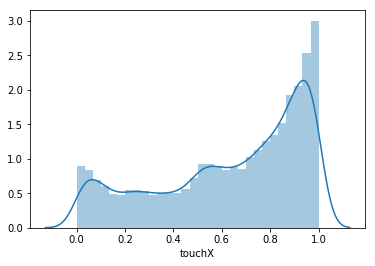

In [87]:
#clicksDF[["touchX","touchY"]].dropna()["touchX"]
sns.distplot(clicksDF[["touchX","touchY"]].dropna()["touchX"]);



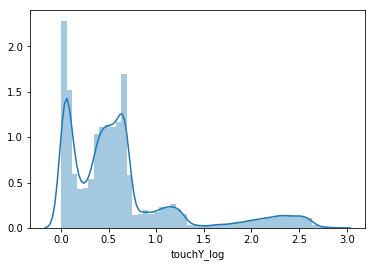

In [88]:
sns.distplot(clicksDF[["touchX","touchY_log"]].dropna()["touchY_log"]);

In [95]:
clicksDF.loc[clicksDF['specs_brand']=='8930605132947907029', ["touchX","touchY_log"]]

,touchX,touchY_log
trans_id,,
MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,NaN,NaN
dg_VX8Rt-2sSgam8DgfO16cj5syf3Gg,NaN,NaN
9d4llMoPQbuUzPZsuTuM_fMk2akkSk0,NaN,NaN
M6IYALEzxuxR6OdGVamy6xYtsXLl5lU,NaN,NaN
YvsQvLXxBz2toaiwnX7QqhOxRmKw400,NaN,NaN
faQwOu3qgxAsZcO9UXgD7l-g5anq8CU,NaN,NaN
HEjSx9RETolx0spYqaXKHVsb6vv82kw,NaN,NaN
2QAnNngWBWL8FQc-nekeDD3q9KMvDgE,NaN,NaN
guA32SPbDn2-zuiiD3fJqt9ZR8ri1jk,NaN,NaN


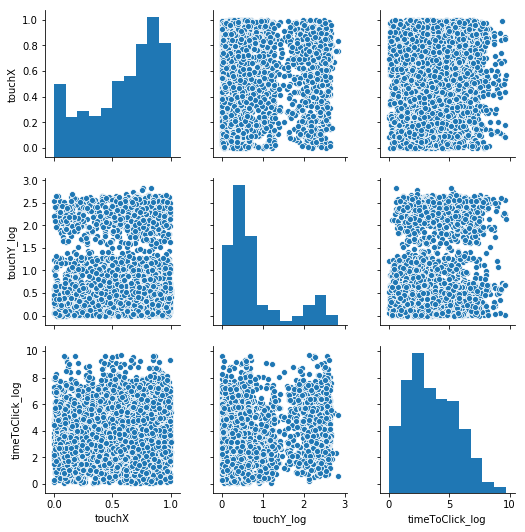

In [117]:
sns.pairplot(clicksDF.loc[(clicksDF['specs_brand']=='392184377613098015') & (clicksDF['os_major']==major0),["touchX","touchY_log","timeToClick_log"]].dropna());


In [105]:
clicksDF[["touchX","touchY_log",'specs_brand','os_major']].dropna()['os_major'].value_counts().index[0]

'3.072849339937028e+18'

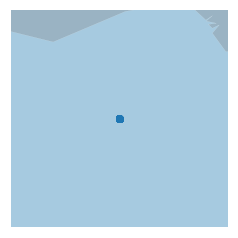

In [17]:
# Set the dimension of the figure
my_dpi=96
#plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

data = clicksDF[['latitude','longitude']]

 
# Make the background map
m=Basemap(llcrnrlon=(data['longitude'].min()-5), llcrnrlat=(data['latitude'].min()-5),urcrnrlon=(data['longitude'].max()+5),urcrnrlat=(data['latitude'].max()+5))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['longitude'], data['latitude'], alpha=0.4, cmap="Set1")
 
# copyright and source data info
#plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 



In [12]:
data['longitude'].describe()

count    26351.000000
mean         1.070295
std          0.001897
min          1.058204
25%          1.070234
50%          1.070234
75%          1.070234
max          1.085358
Name: longitude, dtype: float64

In [5]:
data.head(100)

,homelon,homelat,homecontinent,n,labels_enc
0,-178.12,-14.29,Australia,10,0
1,-172.10,-13.76,NaN,2,-1
2,-159.72,21.97,NaN,6,-1
3,-159.59,21.91,North America,4,1
4,-159.53,22.10,North America,37,1
